In [1]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from datetime import datetime,timedelta
from dateutil import relativedelta

In [2]:
import json

In [3]:
with open("ReportEventCounter.json","r") as f:
    d=json.load(f)

In [8]:
day_to_month = [1] * 31 + [2] * 28 + [3] * 31 + [4] * 30 + [5] * 31 + [6] * 30 \
                   + [7] * 31 + [8] * 31 + [9] * 30 + [10] * 31 + [11] * 30 + [12] * 31

In [9]:
cases = np.array(d["Channels"]["Received_Treatment"]["Data"])

sim_duration_years = np.round(len(cases)/365).astype(int)
year = np.repeat(np.arange(sim_duration_years), 365)
month = []
for i in range(sim_duration_years):
    month += day_to_month

sim_data = pd.DataFrame({'year': year,
                         'month': month,
                         'cases': cases})
# Aggregate by month:
sim_data = sim_data.groupby(['year', 'month']).agg({"cases": "sum"}).reset_index()

In [12]:
sim_data["year_actual"] = sim_data["year"] + (2019-60)

In [17]:
sim_data['first_day_of_month'] = pd.to_datetime(sim_data['year_actual'].astype(str) + '-' + sim_data['month'].astype(str) + '-01')

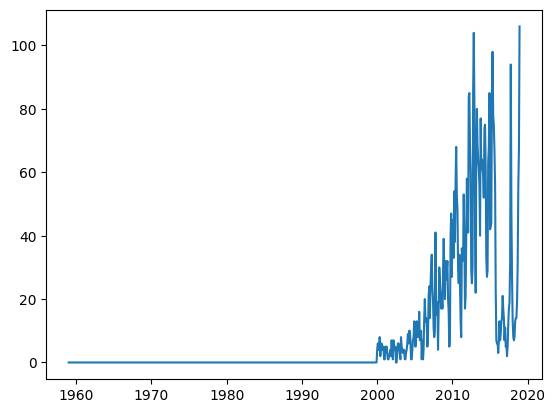

In [20]:
plt.plot_date(sim_data["first_day_of_month"], sim_data["cases"], fmt='-')

In [21]:
inc_data = pd.read_csv("magude_incidence.csv")
inc_data

,fulldate,cases,pop
0,2014-01-01,1118,44529.0
1,2014-02-01,557,44529.0
2,2014-03-01,758,44529.0
3,2014-04-01,250,44529.0
4,2014-05-01,226,44529.0
5,2014-06-01,238,44529.0
6,2014-07-01,89,44529.0
7,2014-08-01,56,44529.0
8,2014-09-01,591,44529.0
9,2014-10-01,508,44529.0


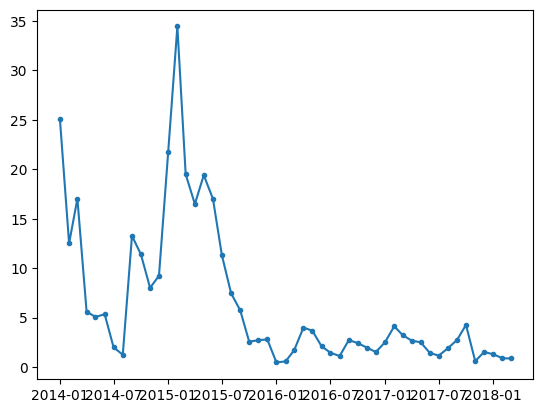

In [28]:
plt.plot_date(pd.to_datetime(inc_data["fulldate"]), inc_data["cases"]*(1000/inc_data["pop"]), fmt=".-")

(15706.0, 17897.0)

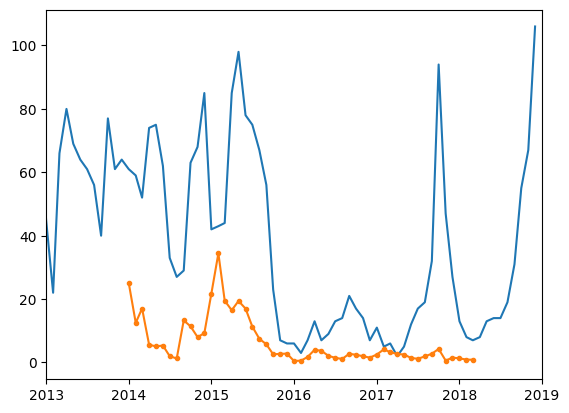

In [30]:
plt.plot_date(sim_data["first_day_of_month"], sim_data["cases"], fmt='-')
plt.plot_date(pd.to_datetime(inc_data["fulldate"]), inc_data["cases"]*(1000/inc_data["pop"]), fmt=".-")
plt.xlim([pd.to_datetime("2013-01-01"),pd.to_datetime("2019-01-01")])

In [36]:
import numpy as np

s = 70
x = np.zeros(1000)
for i in range(1000):
    if i == 0:
        x[i] = s
    else:
        x[i] = x[i-1]*(1+0.05/12) + 3

y = np.arange(1000)/12

(0.0, 500.0)

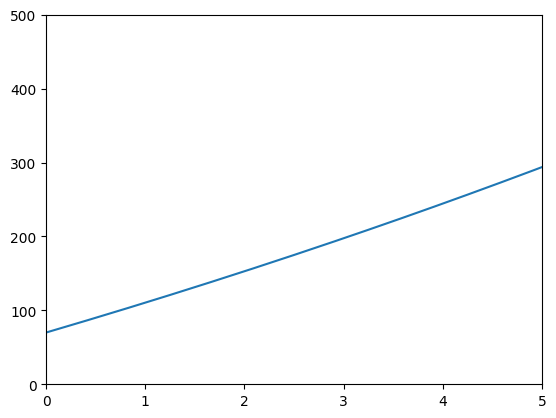

In [42]:
plt.plot(y,x)
plt.xlim([0,5])
plt.ylim([0,500])